Import pandas and matplotlib to show the analysis using csv file generated.

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

read csv file and print the data frame

In [4]:
csv_path = '/home/piyush/Desktop/Study/Research Project/ClusterScheduler/gavel/analysis/output.csv'
df = pd.read_csv(csv_path)
df

,worker,model1,scale1,batchsize1,throughput1,model2,scale2,batchsize2,throughput2
0,k80,ResNet-18,1,16,4.795295,x,0,0,0.000000
1,k80,ResNet-18,1,16,2.539980,ResNet-18,1,32,3.120193
2,k80,ResNet-18,1,16,2.408173,ResNet-18,1,16,2.408173
3,k80,ResNet-18,1,16,2.714823,ResNet-18,1,64,3.107321
4,k80,ResNet-18,1,16,2.453995,ResNet-50,1,16,0.982703
...,...,...,...,...,...,...,...,...,...
10825,k80_unconsolidated,LM,8,80,0.000000,LM,8,5,0.000000
10826,k80_unconsolidated,LM,8,80,0.000000,LM,8,10,0.000000
10827,k80_unconsolidated,LM,8,80,0.000000,LM,8,20,0.000000
10828,k80_unconsolidated,LM,8,80,0.000000,LM,8,40,0.000000


perform query on data frame to select

In [13]:
df_worker = df.query('(model2 == "x") & (worker == "k80") & model1 == "ResNet-18" & scale1 == 1')
df_worker

,worker,model1,scale1,batchsize1,throughput1,model2,scale2,batchsize2,throughput2
0,k80,ResNet-18,1,16,4.795295,x,0,0,0.0
27,k80,ResNet-18,1,32,7.175821,x,0,0,0.0
54,k80,ResNet-18,1,64,7.052081,x,0,0,0.0
81,k80,ResNet-18,1,128,1.806530,x,0,0,0.0
108,k80,ResNet-18,1,256,0.885580,x,0,0,0.0


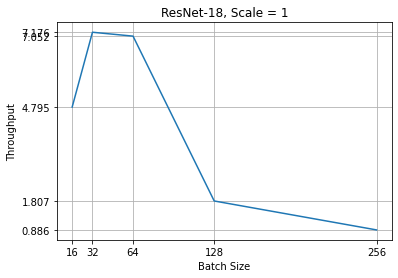

In [26]:
plt.figure()
df_worker1 = df_worker["batchsize1"]
df_worker2 = df_worker["throughput1"]
plt.xlabel('Batch Size')
plt.ylabel('Throughput')
plt.title('ResNet-18, Scale = 1')
plt.grid(True)
plt.xticks(df_worker1)
plt.yticks(df_worker2)
plt.plot(df_worker1, df_worker2)